In [1]:
import node
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/nuforc_reports.csv')
#df.head(5)

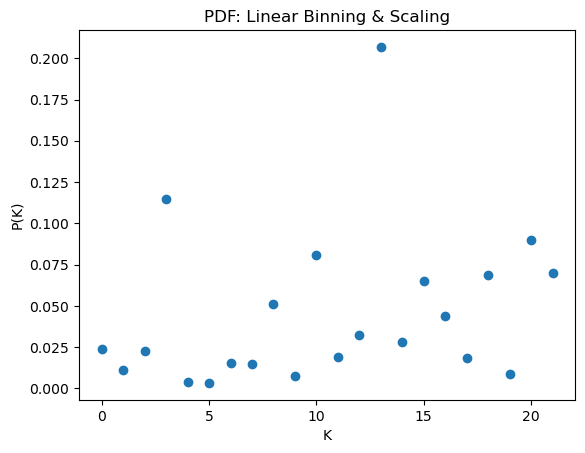

In [3]:
shapes = node.vect(list(df['shape']),True)

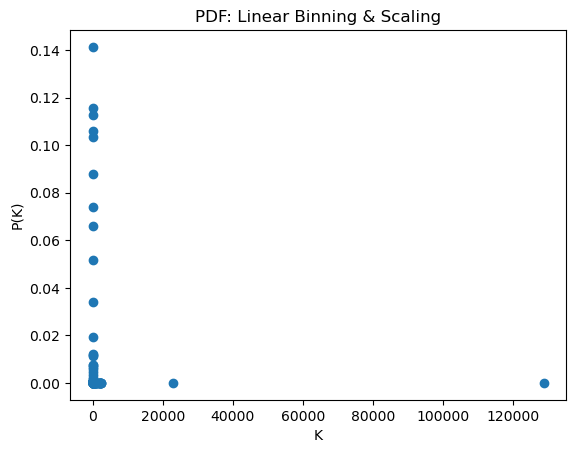

In [4]:
time_seen = node.vect(list(df['duration']),False,True)


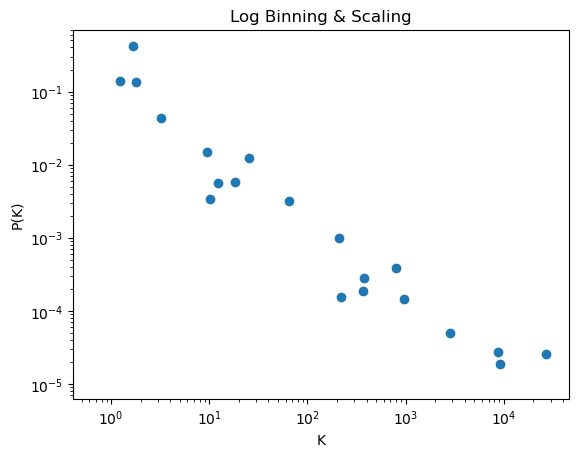

3.81


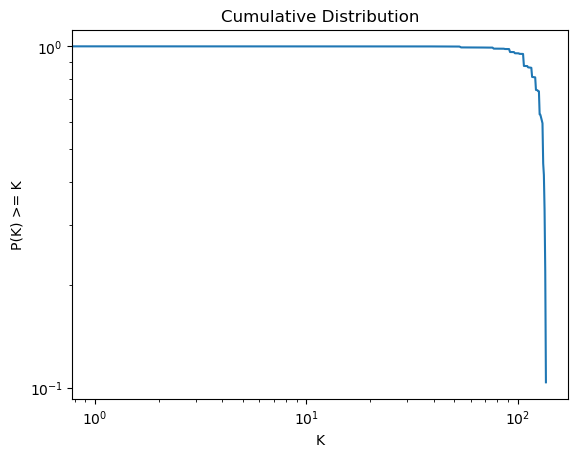

entropy: 3.81
variance: 194937.06433109762
vector_mu: 12.195982978723404
std: 441.51677695315


In [5]:
time_seen.basic_stats()

In [9]:
talky = list(df['text'])


In [8]:
#len(shapes.hist_cnt)
len(time_seen.log_prob_vector)

49